In [118]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [198]:
X , y = make_blobs(n_samples=200,n_features=2,random_state=0)

K = 3 # the number of centroids

X_train, X_test ,y_train , y_test  = train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape)

(160, 2)


In [199]:
# Centroids initialization

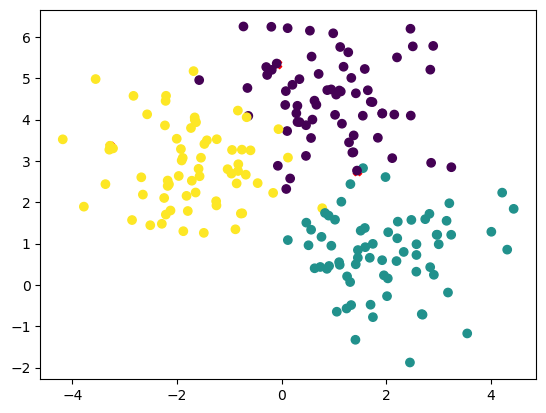

In [200]:
def initialize_centroids(X, K):
    
    random_permutation = np.random.permutation(X.shape[0]) # We Randomly reorder the indices of examples
    
    centroids = X[random_permutation[:K]] # We Take the first K examples as centroids
    
    return centroids

centroids = initialize_centroids(X_train, K) # We have just taken 3 element of dataset,of course, it is random

plt.scatter(centroids[:,0],centroids[:,1],marker='X',c='red')
plt.scatter(X[:,0],X[:,1],c=y)

# Find closest Centroid
For each point (representing a row of X ,our training data) , we wanna know which is the closest centroid
We compute the distance beween a particular point and all centroids, we keep the centroid whose distance is minimum.
For getting distance , we use norm:
$$ distance = || x - centroid ||^2 $$

In [160]:
def find_closest(X,centroids):
    #print(X,centroids)
    K = centroids.shape[0]
    m = X.shape[0]

    idx = np.zeros(m,dtype=int)
    #print(idx)
    for point in range(m):
        
        distances = []
        for k in range(K):
            distance_point_centroids = np.linalg.norm(X[point] - centroids[k])# We calculate the distance between a particular point with all centroids
            distances.append(distance_point_centroids)
            
        idx[point] = np.argmin(distances) # We get the minimum distance or and assign a point to closest centroids

    return idx

In [161]:
idx = find_closest(X_train,centroids)

# Centroids
$$ \mu_k = \frac{1}{|C_k|} \sum_{i \in C_k} xi  $$
Keep in mind , we just compute the mean

In [162]:
def update_centroids(X,idx,K):
    # X is our training data
    # K is the number of centroids

    m,n = X.shape # m is the number of training dat and n is the number of features
    updated_centroids = np.zeros((K,n))

    for k in range(K):
        point = X[idx==k] # Here we apply a mask, we just keep point which belong to particular centroids
        updated_centroids[k] = np.mean(point,axis=0)

    return updated_centroids
    

In [163]:
updated_centroids = update_centroids(X_train,idx,K)

In [164]:
def KMeans(X,K,initial_centroids,max_iter):

    m , n = X.shape
    
    idx = np.zeros(m)
    centroids = initial_centroids
    previous_centroids = centroids

    centroid_set = []
    for i in range(max_iter):

        idx = find_closest(X,centroids)
        centroids = update_centroids(X,idx,K)
        centroid_set.append(centroids)
        

    return centroids , idx,centroid_set

In [192]:
max_iter = 100
centroids , idx , centroid_set = KMeans(X_train,K,centroids,max_iter)

print(centroids)
print(len(centroid_set))

[[ 2.58297185  4.93800941]
 [ 0.27137713 -5.53254113]
 [ 5.53439758 -9.6172545 ]]
100


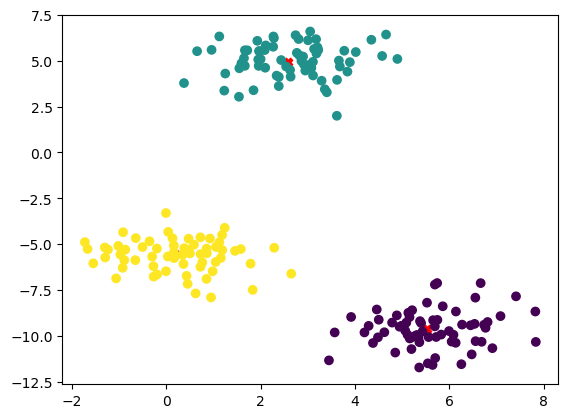

In [193]:
plt.scatter(centroids[:,0],centroids[:,1],marker='X',c='red')
plt.scatter(X[:,0],X[:,1],c=y)


In [194]:
y_predict = find_closest(X_test,centroids)

In [195]:
print(y_predict)

[0 1 2 1 2 0 2 0 1 0 1 0 1 1 2 2 1 1 2 2 2 0 0 2 2 0 0 0 0 2 2 1 2 2 2 0 0
 1 1 0]


In [197]:
acc = accuracy_score(y_test , y_predict)
print(acc)

0.0


# Cons
Dimension Curse